## Matricule & noms : 
`David-Olivier Roy - xxx`
  
`Amine Melbouci    - xxx`  
  
`Marc-Antoine Huet - xxx`

### <center> ELE8812 - Traitement et analyse d'images </center>
<center> Travail practique No. 2 </center>
<center>Hiver 2021 </center>

<div class="alert alert-block alert-danger">
Ce <a href="https://realpython.com/matlab-vs-python/"> lien</a> vous permettra de voir les différences fondamentales entre Python et Matlab. Ne passez pas forcement par les étapes d'installation.
</div>

Ce travail pratique a pour objet de vous permettre de vous familiariser avec la manipulation de  représentations  fréquentielles  discrètes  des  images.  Il  vous  donnera  également l’occasion de mettre en œuvre certains traitements vus en cours et de les comparer avec leur équivalent dans le domaine spatial. Trois points seront abordés:
<b>
1. La représentation fréquentielle
2. Le rehaussement dans le domaine de fourier
3. Le détramage par réjection de fréquences
</b>

Les données à utiliser pour effectuer ce travail pratique se trouvent dans l’archive <I>TP2.zip</I> disponible sur le site web du cours. 

<b>Pondération</b> 
-  Représentation fréquentielle : 4 pts 
-  Rehaussement dans le domaine de Fourier: 7 pts 
-  Détramage par réjection de fréquences : 7 pts 
-  Qualités de la langue et du rapport : 2 pts 
-  <b>Total : 20 points</b> 

<b>Date de remise</b>  
- Groupe 1: 28 février 23h59  
- Groupe 2: 7 mars 23h59  

<div class="alert alert-block alert-info">


La cellule ci dessous effectue des <code>import</code> cela s'assimile a un<code>addpath</code> en matlab. Le but est d'amener des fonctions extérieures (packages) dans le notebook afin que Python les reconnaisse.  
<code> import package as pkg</code> permet de raccourcir le nom de ce dernier. Les fonctions contenues dans 'package' seront alors appelées ainsi <code>pkg.function()</code><br>
    
Vous pouvez chercher sur google chacun des package appelés ci-dessous afin d'obtenir leur documentation.<br>

N'oubliez pas de relancer cette cellule si jamais vous redemarrez le Kernel !!
</div>

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imread
import cv2
import numpy as np
from pylab import ginput
from scipy import signal
import matplotlib
from scipy.ndimage import convolve

%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 10)

##  1. Représentation fréquentielle (4 pts)

Représenter  et  interpréter  correctement  une  image  dans  le  domaine  fréquentiel  est  un 
préalable indispensable à tout traitement dans ce domaine. Cette question vous permettra 
de vous familiariser avec la représentation spectrale des images. 

### 1.1. Indexation des axes fréquentiels (2 pts)

<div class="alert alert-block alert-warning">




Chargez l’image <I>Voiture.tif</I> et représentez-la dans le domaine spectral (<I>fft2</I>) selon 
la convention usuelle (fréquence nulle au voisinage du centre de l’image). Indexez les axes 
en fréquences réduites (comprises entre −1/2 et 1/2).

<b>Note</b> :
Par convention, la fonction <I>fft2</I> de numpy ordonne les fréquences de 0 &rarr; N/2, puis de –N/2 + 1 &rarr; -1 pour chaque dimension de la matrice transformée. On pourra utiliser la fonction <I>fftshift</I> de numpy pour placer la fréquence nulle au centre de l’image. Consulter l’aide de cette fonction pour plus de détails (<I>doc [fftshift](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html)</I>). Vous pouvez appeler la fonction comme suit: 
    
 <code>np.fft.fft2</code>  <code>np.fft.fftshift</code>

Pour augmenter le contraste de la fft, il est possible de normaliser en faisant 1 + log(FFT) pour mieux discerner les intensités.
</div>

Text(0.5, 1.0, 'FFT contraste')

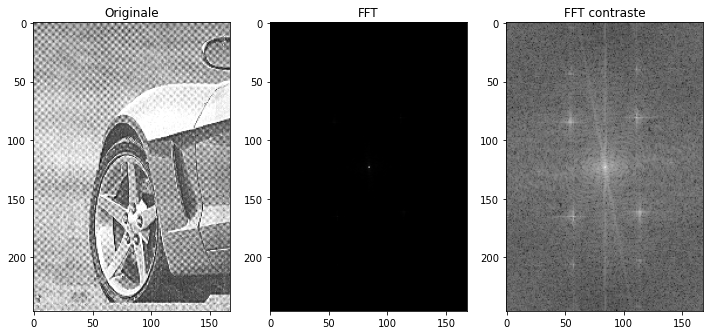

In [5]:
img=plt.imread('Voiture.tif')
plt.subplot(1,3,1)#Image originale
plt.title("Originale")
plt.imshow(img, cmap='gray')
b = np.fft.fft2(img)
c = np.fft.fftshift(abs(b))
plt.subplot(1,3,2)#Image FFT
plt.imshow(c, cmap='gray')
plt.title("FFT")
plt.subplot(1,3,3)#Image FFT avec contraste normalisé
d = (np.log(c))+1
plt.imshow(d, cmap='gray')
plt.title("FFT contraste")


<div class="alert alert-block alert-warning">

Donnez, en fréquences réduites puis en nombres de pixels, les coordonnées des 9 « points brillants » dont l’amplitude est la plus grande. Vous pouvez utiliser la function `ginput` qui vous permettra de cliquer sur les points les plus brillants de l'image pour en retirer les coordonnées.</div>

[(54.15215180949926, 42.77473614999289), (110.51336026625634, 40.106749950856454), (54.15215180949926, 84.79551878639163), (110.51336026625634, 81.12703776257905), (83.83349827489204, 122.48082384919368), (56.4866397337436, 165.16860303537658), (113.84834301517688, 162.5006168362401), (57.15363628352773, 206.18889084709917), (113.51484474028481, 203.18740637307067)]


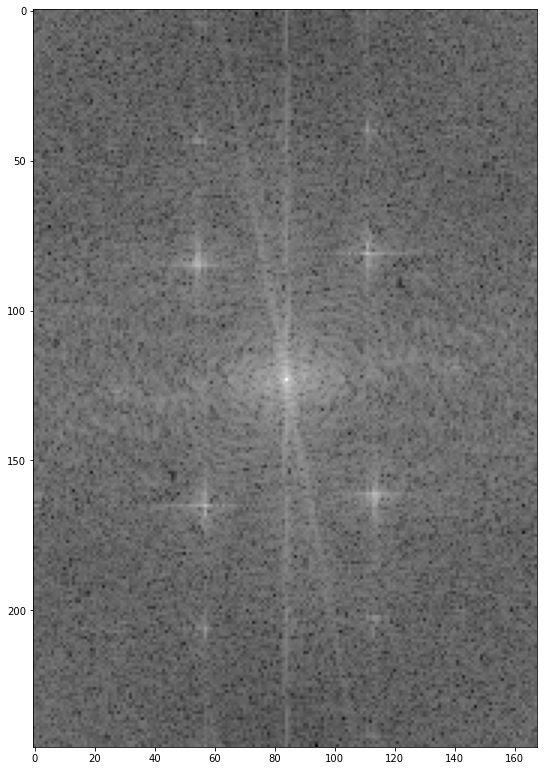

In [22]:
# Ceci sera nécessaire pour utiliser ginput dans le jupyter notebook
matplotlib.use('TkAgg')
plt.imshow(d, cmap='gray')
x = plt.ginput(9) 
print(x) 



(56.438189845474625, 206.58167770419425),  
<bv>
(113.45805739514353, 203.4139072847682),  
<bv>
(57.343267108167794, 164.94812362030905),  
<bv>
(113.45805739514353, 161.78035320088298),  
<bv>
(84.0430463576159, 122.86203090507726),  
<bv>
(53.72295805739515, 84.39624724061812),  
<bv>
(111.19536423841063, 80.32339955849892),  
<bv>
(110.74282560706405, 40.047461368653444),  
<bv>
(55.0805739514349, 43.21523178807948)


### 1.2. Effet de la parité des dimensions sur l’image (2 pts)
<div class="alert alert-block alert-warning">


Appliquez la fonction <I>ifftshift</I> à la représentation fréquentielle de l’image obtenue  à  la  question  précédente,  puis  prenez-en  la  transformée  de  Fourier  inverse (<I>ifft2</I>). L'image contiendra des nombres complexes. Pour obtenir les intensités, il faut appliquer <I>np.real</I> pour conserver seulement les nombres réels.  Comparez  le  résultat  à  l’image  de  départ. Vous pouvez appeler la fonction comme suit: 
<code>np.fft.ifftshift</code>   <code>np.fft.ifft2</code>  <code>np.real</code>  </div>


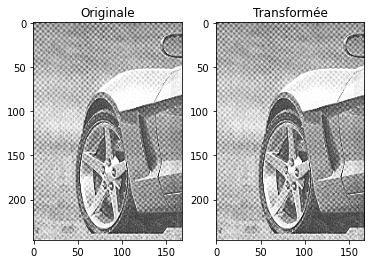

In [8]:
z=np.fft.fft2(img)
y=np.fft.fftshift(z)

# Garder cette ligne une fois que vous n'utilisez plus ginput
%matplotlib inline

e=np.fft.ifftshift(y)
f=np.fft.ifft2(e)
g=np.real(f)
plt.subplot(1,2,1)#Image originale
plt.title("Originale")
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)#Image transformée
plt.title("Transformée")
plt.imshow(g, cmap='gray')



<div class="alert alert-block alert-warning">
Appliquez  maintenant  la  fonction 
<I>fftshift</I>  (plutôt  que  <I>ifftshift</I>)  de  numpy  à  la  représentation  fréquentielle  de 
l’image obtenue à la question précédente, puis prenez-en la transformée de Fourier inverse. 
Comparez le résultat à l’image de départ.</div>

Text(0.5, 1.0, 'Transformée')

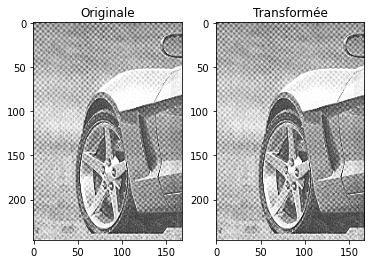

In [24]:
h=np.fft.fftshift(y)
i=np.fft.ifft2(h)
j=np.real(i)
plt.subplot(1,2,1)#Image originale
plt.title("Originale")
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)#Image transformée
plt.imshow(j, cmap='gray')
plt.title("Transformée")


<div class="alert alert-block alert-warning">
- Que constatez-vous ? 
</div>

<div class="alert alert-block alert-success"> 
    On constate qu'avec les deux méthodes, l'image retrouve son état initial identique à l'image de départ. L'erreur carrée moyenne est ainsi nulle, ce qui explique les mêmes dimensions et le même résultat obtenu.
</div>

<div class="alert alert-block alert-warning">


Supprimez une ligne et une colonne de l’image <I>Voiture.tif</I> et effectuez de nouveau les  opérations  décrites  dans  le  paragraphe précédent.

Vous pouvez vous aider de la function ```numpy.delete(arr, obj, axis=None)``` </div>

Text(0.5, 1.0, 'Transformée')

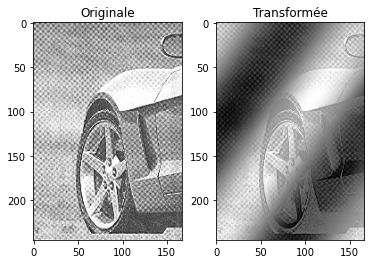

In [25]:
delLine = np.delete(img,100,0) # Delete la 100e ligne
imgDel = np.delete(delLine,100,1) # Delete la 100e colone

z=np.fft.fft2(imgDel)
y=np.fft.fftshift(z)

h=np.fft.fftshift(y)
i=np.fft.ifft2(h)
j=np.real(i)

plt.subplot(1,2,1)#Image originale
plt.imshow(imgDel, cmap='gray')
plt.title("Originale")

plt.subplot(1,2,2)#Image transformée
plt.imshow(j, cmap='gray')
plt.title("Transformée")


<div class="alert alert-block alert-warning">
- Que constatez-vous maintenant? Expliquez  </div>

<div class="alert alert-block alert-success"> 
    Cette fois-ci la reconstruction fait que l'image n'est pas la même au niveau des constrates. En supprimant une colonne ainsi qu'une ligne les dimensions ne sont plus paires. De plus, la transformation en domaine fréquentielle n'offre plus donc plus les même résultats que pour l'image différente. La répartition des fréquences pour ajuster les dimensions de l'image crée ces différences de constrastes. L'apparition d'un bruit périodique se fait alors présent. 
</div>

## 2. Rehaussement dans le domaine de Fourier (7 pts)
### 2.1. Rehaussement par masquage flou (3 pts) 

<div class="alert alert-block alert-warning">

Chargez l’image <b><I>Lune2.tif</I></b> et mettez en œuvre un rehaussement par masquage flou dans le domaine de Fourier (voir section 3.2 du TP1 pour un rappel sur le rehaussement par masquage flou. Formule: G = 𝐹 + 𝑎 [ 𝐹 − 𝐹′ ]). Pour cela, utilisez un filtre Butterworth ou gaussian passe-bas, puis faites varier la fréquence de coupure et le coefficient de masquage. Utilisez les fonctions fournies:```filtpb_gaus``` et ```filtpg_butter```.</div>

In [20]:
def filtpb_gauss(A, fc):
    """ Application d'un filtre gaussien sur une image im à une fréquence de coupure fc dans 
        le domaine fréquentiel
    
    A (ndarray): Image d'entrée
    fc (float): Fréquence de coupure
    """
    M, N = A.shape

    # Image dans le domaine fréquentiel
    AA = np.fft.fftshift(np.fft.fft2(A))

    M0 = np.ceil((M+1) / 2)
    N0 = np.ceil((N+1) / 2)

    U, V = np.mgrid[1:M+1, 1:N+1]
    D2 = (U - M0)**2 + (V - N0)**2
    
    # Réponse fréquentielle du filtre gaussien
    HH = np.exp(-D2 / (2 * fc**2))
    
    # Application du filtre et retour au domaine spatial
    BB = np.fft.ifftshift(AA * HH)
    B = np.fft.ifft2(BB)
    B = np.real(B)
    return B      


In [21]:
def filtpb_butter(A, fc, ordre):
    """ Application d'un filtre Butterworth sur une image im à une fréquence de coupure fc dans 
        le domaine fréquentiel
    
    A (ndarray): Image d'entrée
    fc (float): Fréquence de coupure
    ordre (int): Ordre du filtre
    """
    M,N=A.shape

    # Image dans le domaine fréquentiel
    AA = np.fft.fftshift(np.fft.fft2(A))

    M0 = np.ceil((M+1) / 2)
    N0 = np.ceil((N+1) / 2)

    U, V = np.mgrid[1:M+1, 1:N+1]
    D2 = (U - M0)**2 + (V - N0)**2

    # Réponse fréquentielle du filtre Butterworth
    HH = 1 / (1 + (D2 / fc**2)**ordre)
    
    # Application du filtre et retour au domaine spatial
    BB = np.fft.ifftshift(AA * HH)
    B = np.fft.ifft2(BB)
    B = np.real(B)
    return B 

In [22]:
# Création d'une fonction pour afficher les images en fonction des filtres séléctionnés
def r_Fourrier(img, a, fc, filtre,ordre):
    if(filtre == "filtpb_butter"):
        F = filtpb_butter(img, fc, ordre)
    if(filtre == "filtpb_gauss"):
        F = filtpb_gauss(img, fc)
    
    F_ = F / np.max(F)
    img_ = img + a * (img - F_)
    return plt.imshow(img_,cmap='gray')

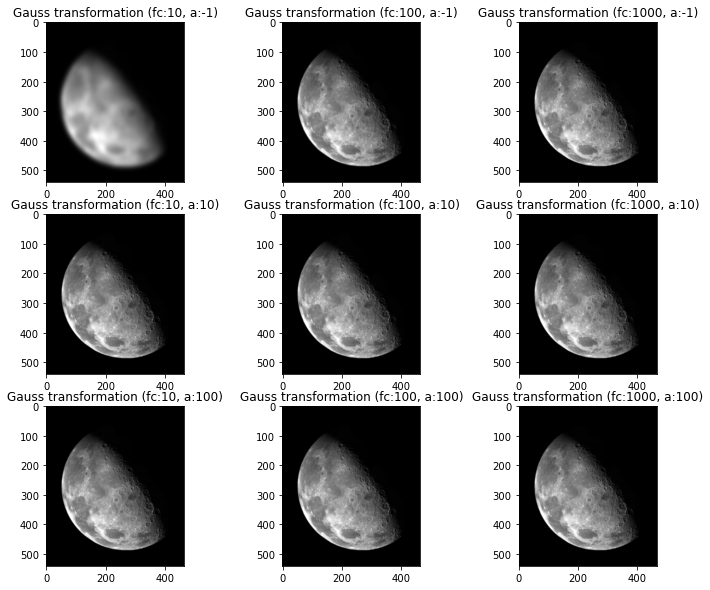

In [26]:
img=plt.imread('Lune2.tif')
# Test Gauss
fc = [10, 100, 1000,10, 100, 1000,10, 100, 1000]
a = [-1, -1, -1, 10, 10, 10,100, 100, 100]
for i in range(9):
    plt.subplot(3,3,i+1)
    r_Fourrier(img,a[i],fc[i],"filtpb_gauss", 2 )
    plt.title('Gauss transformation (fc:'+str(fc[i])+ ', a:' + str(a[i])+')')

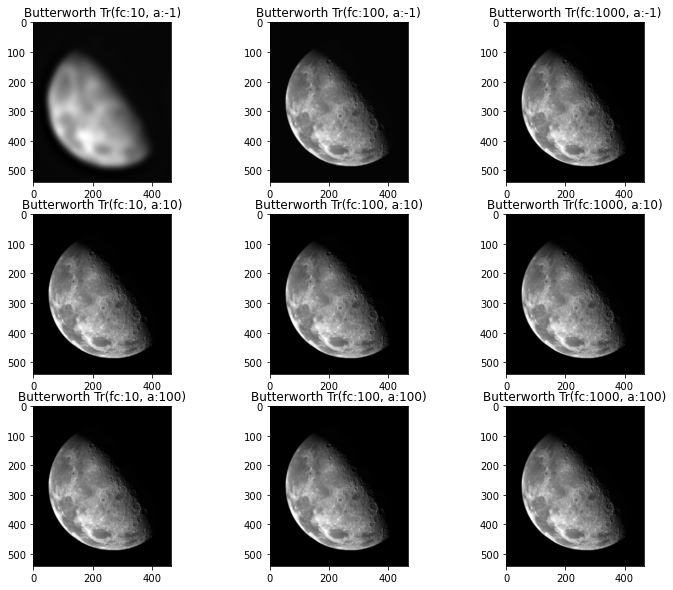

In [27]:
# Butterworth
img=plt.imread('Lune2.tif')
# Test Butter
fc = [10, 100, 1000,10, 100, 1000,10, 100, 1000]
a = [-1, -1, -1, 10, 10, 10,100, 100, 100]
for i in range(9):
    plt.subplot(3,3,i+1)
    r_Fourrier(img,a[i],fc[i],"filtpb_butter", 2 )
    plt.title('Butterworth Tr(fc:'+str(fc[i])+ ', a:' + str(a[i])+')')

<div class="alert alert-block alert-warning">
- Qu'observez-vous ?</div>

<div class="alert alert-block alert-success"> 
    À travers les transformations de Gauss et de Butterworth on arrive au même constat: en ayant une fréquence de coupure faible, on perd de la résolution et la netteté est inférieure d'autant plus si le coefficient de masquage est faible. De plus, le coefficient de masquage plus est élevé, plus il offre une meilleure clareté. Cependant, c'est la fréquence de coupure qui a un plus grand impact sur la clareté et la résolution d'une image. 
    Que ce soit par Gauss ou Butterworth, un filtre passe-bas a pour effet de filrer les bruits, donc en attribuant une fréquence de coupure faible, on filtre une grande quantité d'information de notre image. 
</div>

<div class="alert alert-block alert-warning">

Utilisez le script <I>unsharp_filter.m</I>, qui met en œuvre le rehaussement par masquage 
flou dans le domaine spatial étudié lors du TP1, et appliquez le filtrage à l’image de la lune. 
Comparez les deux approches (spatiale & fréquentielle), en ce qui concerne tant la mise en 
œuvre que les résultats. 
</div>

In [29]:
# On utilise à titre d'exemple l'image filtre gaussian (Low-Pass Filter)
def unsharp_filter(img, taille_masque, coefficient_de_rehaussement):
    """ Rehaussement par masquage par flou dans le domaine spatial
    
    img (ndarray): Image d'entrée
    taille_masque (int): Taille du masque gaussien
    coefficient_de_rehaussement (float): a dans la formule du masquage par flou G = 𝐹 + 𝑎 [ 𝐹 − 𝐹′ ] 
    """
    a = coefficient_de_rehaussement
    Fprime = cv2.blur(img, (taille_masque, taille_masque))
    norm_Fprime = Fprime / np.max(Fprime)
    return img + a * (img - norm_Fprime)

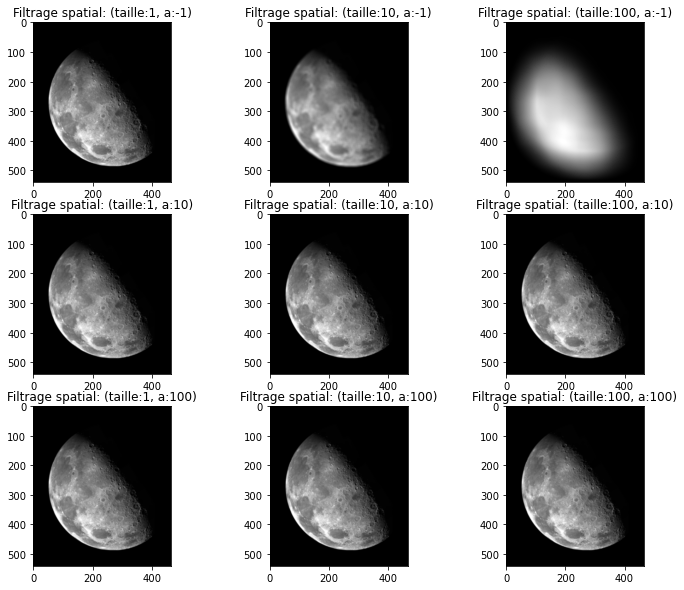

In [30]:
img=plt.imread('Lune2.tif')
size = [1, 10, 100, 1, 10, 100, 1, 10, 100]
a = [-1, -1, -1, 10, 10, 10,100, 100, 100]
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(unsharp_filter(img, size[i], a[i]),cmap='gray')
    plt.title('Filtrage spatial: (taille:'+str(size[i])+ ', a:' + str(a[i])+ ')')


<div class="alert alert-block alert-success"> 
    En ce qui concerne le filtrage dans le domaine spatial, on constate que plus la taille du filtre est élevé, plus on perd de la clareté. On arrive au même constat qu'avec les approches du domaine fréquentiel. Il est évident que plus la taille du filtre est élevé, plus des données seront filtrées et ainsi qu'une plus grande perte de données.
    En ce qui concdrne le coefficient de masquage a le même effet que pour le domaine fréquentiel. 

</div>

### 2.2. Rehaussement par Laplacien (4 pts) 
<div class="alert alert-block alert-warning">


Mettez en œuvre le rehaussement par Laplacien dans le domaine spectral en programmant directement la forme donnée en cours.Il peut être implémenté à l’aide de l’équation suivante:

\begin{equation*}
\triangledown^2I(x,y)\xrightarrow{\text{F}}-4\pi^2D^2(u,v)\bullet I_F(u,v)
\end{equation*}

Où  $𝐼_𝐹 (𝑢, 𝑣)$  est la représentation fréquentielle avec fréquence centrée de l’image  $𝐼(𝑥, 𝑦)$  et  $𝐷^2 (𝑢, 𝑣)$ la distance euclidienne au carrée entre les fréquences  $(𝑢, 𝑣)$  et la fréquence centrale. Cette formulation est équivalente à la forme spatiale du filtre Laplacien en raison 
de la théorie de convolution de la transformée de Fourier. Pour plus de détails, consulter les diapositives du cours 4. 
    
Vous pouvez vous inspirez du code des fonctions `filtpb_gauss` et `filtpb_butter` pour vous aider.
</div>

In [34]:
def r_Laplacien(img, a):
    """ Application d'un réhaussement Laplacien sur l'image sélectionnée   
    img (ndarray): Image d'entrée
    a (integer): coefficient de floutage 
    """
    M,N=img.shape
    img_norm =img/np.max(img)

    # Image dans le domaine fréquentiel
    AA = np.fft.fftshift(np.fft.fft2(img))

    M0 = np.ceil((M+1) / 2)
    N0 = np.ceil((N+1) / 2)

    U, V = np.mgrid[1:M+1, 1:N+1]
    D2 = (U - M0)**2 + (V - N0)**2

    # Réponse fréquentielle du filtre à partir de la relation de l'énoncé
    HH = -4*(np.pi**2)*D2
    
    # Application du filtre et retour au domaine spatial
    BB = np.fft.ifftshift(AA * HH)
    B = np.fft.ifft2(BB)
    B = np.real(B)
    
    # Affichage de l'image avec réhaussement Laplacien
    img_ =img/np.max(img)
    img_r_Laplacien = B/(np.max(B))
    
    # On ajoute les paramètres vmin=0 et vmax=1 dans le imshow pour ne pas avoir l'effet gris sur les photos et pour pouvoir
    # mieux analyser les effets du réhaussement Laplacien (Comme énoncé dans la sous-question suivante)
    return plt.imshow((img_ + a * img_r_Laplacien),vmin=0, vmax=1, cmap="gray")

Text(0.5, 1.0, 'Réhaussement Laplacien spectral, a: 100')

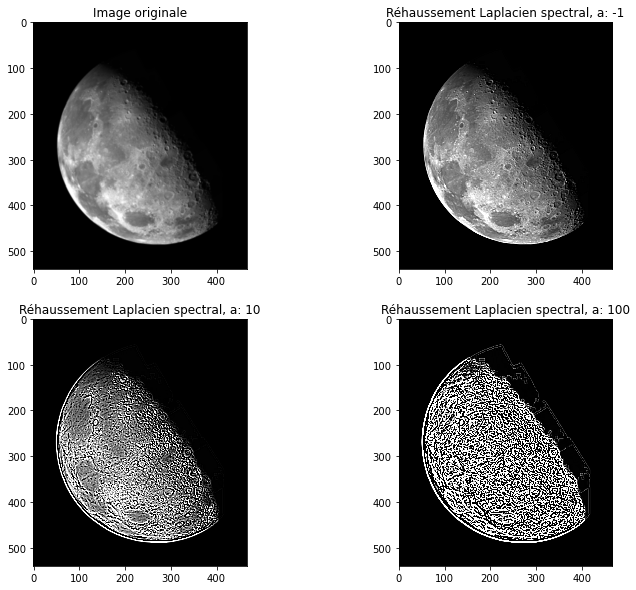

In [33]:
img=plt.imread('Lune2.tif')
plt.subplot(2,2,1)
plt.imshow(img, cmap="gray")
plt.title('Image originale')
plt.subplot(2,2,2)
r_Laplacien(img, -1)
plt.title('Réhaussement Laplacien spectral, a: -1')
plt.subplot(2,2,3)
r_Laplacien(img, 10)
plt.title('Réhaussement Laplacien spectral, a: 10')
plt.subplot(2,2,4)
r_Laplacien(img, 100)
plt.title('Réhaussement Laplacien spectral, a: 100')

<div class="alert alert-block alert-warning">
Mettez ensuite en œuvre le rehaussement par Laplacien dans le 
domaine spatial. Il peut être implémenté à l’aide des noyaux de convolution suivants : 
    
<center>  </center>

$$
\left[\begin{array}{ccc} 
0 &1 &0\\
1 &-4 &1\\
0 &1 &0\;
\end{array}\right]\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;
\left[\begin{array}{ccc} 
1 &1 &1\\
1 &-8 &1\\
1 &1 &1
\end{array}\right]
$$ 
    
Pour rehausser les contours dans le domaine spatial, le Laplacien doit être soustrait à l'image originale:
$I_{rehaussée} = I_{original} - I_{original} * noyau_{laplacien} $
    
Pour mieux visualiser l'effet du filtre laplacien, vous pouvez ajouter les paramètres `vmin=0` et `vmax=1` à la fonction plt.imshow pour obtenir l'affichage entre ces valeurs.
</div>
    


Text(0.5, 1.0, 'Laplacien spatial, noyau: -8')

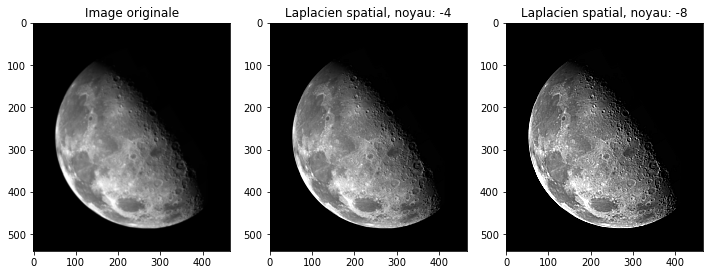

In [35]:
noyau_1 = np.array(( [0, 1, 0], [1, -4, 1], [0, 1, 0]),dtype=int)
noyau_2 = np.array(( [1, 1, 1], [1, -8, 1], [1, 1, 1]),dtype=int)

#Pour trouver les convolutions on utilise la fonction convolve
I_r_1 = img/np.max(img) - convolve(img/np.max(img), noyau_1)
I_r_2 = img/np.max(img) - convolve(img/np.max(img), noyau_2)

#Affichage des images avec réhaussement Laplacien dans le domaine spatial
img=plt.imread('Lune2.tif')
plt.subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.title('Image originale')
plt.subplot(1,3,2)
plt.imshow(I_r_1, vmin=0, vmax=1, cmap="gray")
plt.title('Laplacien spatial, noyau: -4')
plt.subplot(1,3,3)
plt.imshow(I_r_2, vmin=0, vmax=1, cmap="gray")
plt.title('Laplacien spatial, noyau: -8')

<div class="alert alert-block alert-warning">



- Comparez les deux approches (spatial et spectral), en ce qui concerne tant la mise en œuvre que les résultats.
    
</div>

<div class="alert alert-block alert-success"> 
    La mise en oeuvre du réhaussement Laplacien dans le domaine spectrale utilise la multiplication, tandis que dans le domaine spatial, ce dernier utilise une convolution.
    Dans le domaine spectrale, on constate qu'il y a une emphase sur les détails et les principalement les contours de l'image. Le contraste est plus élevé au niveau des détails détectés sur l'image. Pour domaine spatial, on constate une claireté et netteté de l'image largement supérieures. Plus le noyau de convolution semble grand et meilleure est la qualité de l'image. 
</div>

<div class="alert alert-block alert-warning">



- Enfin, comparez le rehaussement par Laplacien et le rehaussement par masquage flou. 
    
</div>

<div class="alert alert-block alert-success"> 
En vu des résultats obtenus, on constate que le réhaussement par masquage flou a principalement pour effet d'accentuer les détails de l'image. L'utilisation de filtre permet entre autres de filtrer du bruit ou autre et par la même occasion de filtrer certains détails. Le réhaussement par Laplacien lui aussi permet d'accentuer les détails de l'image mais toutefois en portant une attention particulière sur les contours d'un objet et de ses détails. En effet, chaque détail est plus "sharp" en fonction d'un noyau de convolution plus grand. 

</div>

## 3. Détramage par réjection de fréquences (7 pts)
On a vu à la question 1 que la représentation fréquentielle de certaines images comporte 
des « points brillants » que l’on peut associer à des trames qui dégradent l’image de départ. 
L’amélioration de telles images peut donc être obtenue en éliminant ces points brillants, ce 
qui correspond à la réjection de « zones fréquentielles » situées autour des points brillants. 
Cette question a pour but de mettre en œuvre un tel filtrage.

<div class="alert alert-block alert-warning">


Développez une fonction permettant de filtrer les fréquences correspondantes aux points brillants. Attention, le centre du spectre de Fourier correspond à la fréquence moyenne de l'image.
    
</div>

In [37]:
image = cv2.imread("Voiture.tif", cv2.IMREAD_GRAYSCALE)
fft1 = np.fft.fftshift(np.fft.fft2(image))

# Sélection des points à supprimer
image = cv2.imread("Voiture.tif", cv2.IMREAD_GRAYSCALE)
fft = np.fft.fftshift(np.fft.fft2(image))
fftAmp = np.log(np.abs(fft1) + 1)
matplotlib.use('TkAgg')
plt.imshow(fftAmp, cmap='gray')
coordinatesPixel = plt.ginput(8)

print("Coordonnées en pixel: \n")
for coordinate in coordinatesPixel:
    print("({:>6.2f}, {:>6.2f})".format(coordinate[0], coordinate[1]))
    
%matplotlib inline

Coordonnées en pixel: 

( 54.18,  43.22)
(111.20,  40.05)
(111.20,  80.78)
( 54.63,  84.85)
( 56.89, 166.31)
(113.91, 161.33)
(114.36, 202.06)
( 56.89, 206.58)


In [38]:
def freqRejectionFilterGauss(image, coordinatesPixel, D0):
    """ Réjection de fréquences par filtre gaussien
    
    image (ndarray): Image d'entrée
    coordinatesPixel: pixels dont on veut supprimer le voisinage
    D0 (float): rayon du filtre gaussien
    """
    M, N = image.shape
    U, V = np.mgrid[1:M+1, 1:N+1]

    AA = np.fft.fftshift(np.fft.fft2(image))
    
    for coordinatePixel in coordinatesPixel:
        U0 = int(coordinatePixel[1])
        V0 = int(coordinatePixel[0])
        D2 = (U - U0)**2 + (V - V0)**2

        # Réponse fréquentielle du filtre gaussien
        HH = 1-np.exp(-D2 / (2 * D0**2))

        # Application du filtre et retour au domaine spatial
        AA = AA * HH
        
    BB = np.fft.ifftshift(AA)
    B = np.real(np.fft.ifft2(BB))
    
    return B, BB

In [39]:
def freqRejectionFilterButter(image, coordinatesPixel, D0, ordre):
    """ Réjection de fréquences par filtre Butterworth
    
    image (ndarray): Image d'entrée
    coordinatesPixel: pixels dont on veut supprimer le voisinage
    D0 (float): rayon du filtre Butterworth
    ordre (int): ordre du filtre
    """
    M, N = image.shape
    U, V = np.mgrid[1:M+1, 1:N+1]

    AA = np.fft.fftshift(np.fft.fft2(image))
    
    for coordinatePixel in coordinatesPixel:
        U0 = int(coordinatePixel[1])
        V0 = int(coordinatePixel[0])
        D2 = (U - U0)**2 + (V - V0)**2

        # Réponse fréquentielle du filtre gaussien
        HH = 1- 1 / (1 + (D2 / D0**2)**ordre)

        # Application du filtre et retour au domaine spatial
        AA = AA * HH
        
    BB = np.fft.ifftshift(AA)
    B = np.real(np.fft.ifft2(BB))
    
    return B, BB

Text(0.5, 1.0, 'TF avec rejection de fréquence')

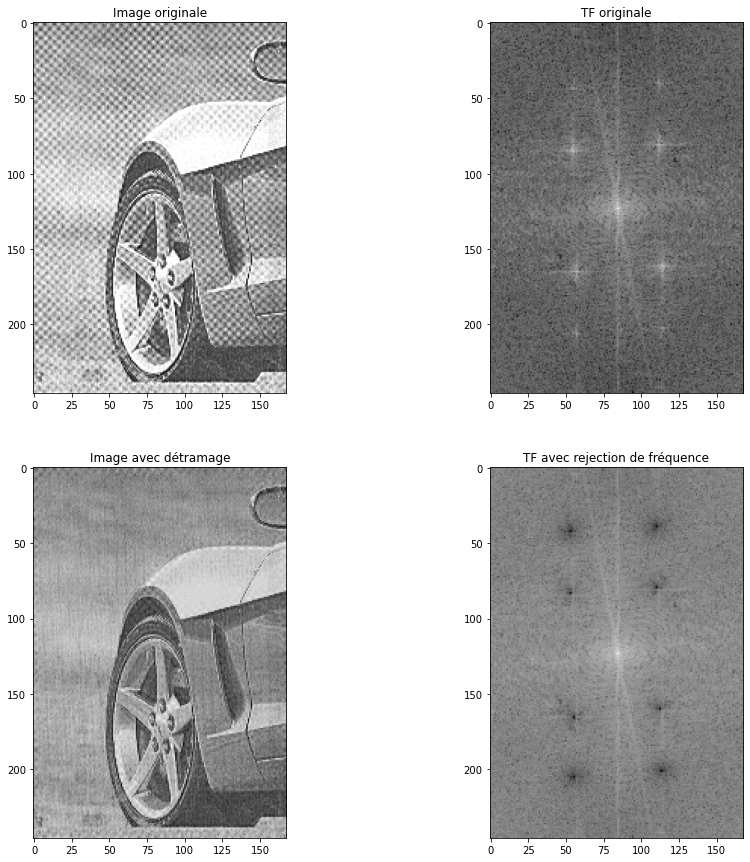

In [51]:
# Filtrage gaussien
D0 = 8
imageMod, fftMod = freqRejectionFilterGauss(image, coordinatesPixel, D0)
fftAmpMod = np.fft.fftshift(np.log(np.abs(fftMod) + 1))

fig, axs = plt.subplots(2,2, figsize=(15,15))
axs[0,0].imshow(image, cmap="gray")
axs[0,0].set_title("Image originale")
axs[0,1].imshow(fftAmp.astype("int"), cmap="gray")
axs[0,1].set_title("TF originale")
axs[1,0].imshow(imageMod.astype("int"), cmap="gray")
axs[1,0].set_title("Image avec détramage")
axs[1,1].imshow(fftAmpMod, cmap="gray")
axs[1,1].set_title("TF avec rejection de fréquence")

Text(0.5, 1.0, 'TF avec rejection de fréquence')

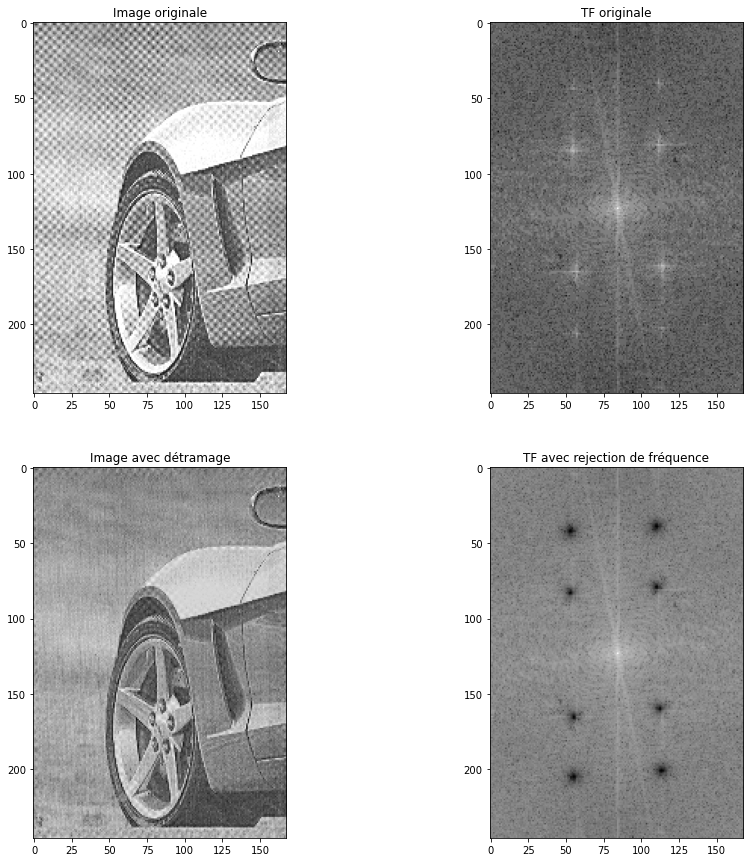

In [48]:
# Filtrage butterworth
D0 = 8
ordre = 2
imageMod, fftMod = freqRejectionFilterButter(image, coordinatesPixel, D0, ordre)
fftAmpMod = np.fft.fftshift(np.log(np.abs(fftMod) + 1))

fig, axs = plt.subplots(2,2, figsize=(15,15))
axs[0,0].imshow(image, cmap="gray")
axs[0,0].set_title("Image originale")
axs[0,1].imshow(fftAmp.astype("int"), cmap="gray")
axs[0,1].set_title("TF originale")
axs[1,0].imshow(imageMod.astype("int"), cmap="gray")
axs[1,0].set_title("Image avec détramage")
axs[1,1].imshow(fftAmpMod, cmap="gray")
axs[1,1].set_title("TF avec rejection de fréquence")

<div class="alert alert-block alert-warning">



- Commentez les résultats obtenus. 
   
</div>

<div class="alert alert-block alert-success"> 
En appliquant le détramage, la qualité de l'image a été grandement restaurée. En effet, en observant la transformée de Fourrier de l'image originale, il est possible de constater la présence de bruit périodique autour de certaines fréquences. En appliquant un filtrage à ces fréquences, le bruit a donc été grandement réduit. 
</div>